Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:03<00:00, 3151181.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 624034.44it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 1952894.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2544141.13it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



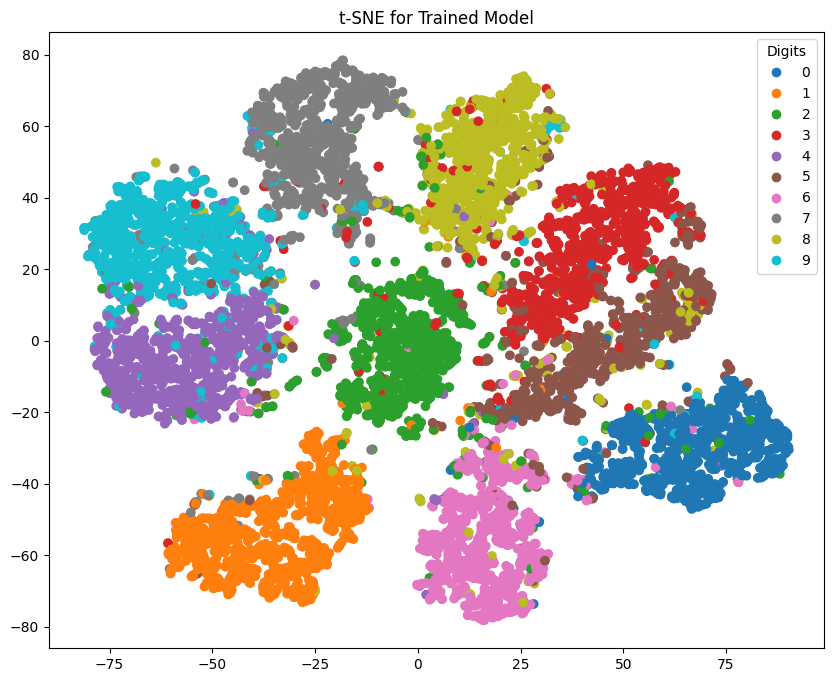

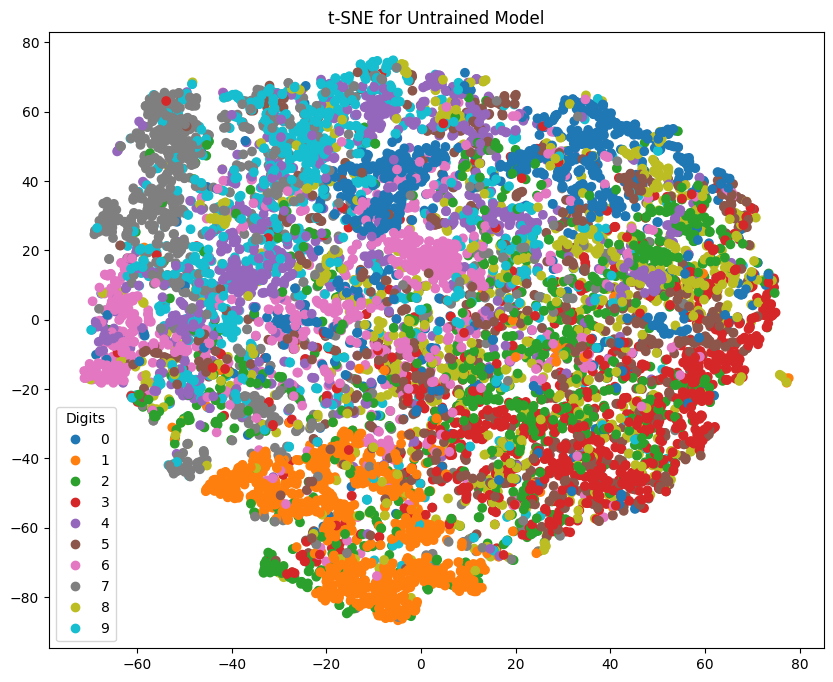

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Training the MLP
def train(model, trainloader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, trainloader, optimizer, criterion, epochs=5)

# 5. Get the hidden layer output for t-SNE from the trained model
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output)
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get hidden representations
trained_hidden, labels = get_hidden_representations(model, testloader)

# 6. t-SNE visualization
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10')
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for trained model
plot_tsne(trained_hidden.numpy(), labels.numpy(), 't-SNE for Trained Model')

# 7. t-SNE for untrained model
# Instantiate a new untrained model and get hidden representations
untrained_model = MLP()  # untrained model
untrained_hidden, _ = get_hidden_representations(untrained_model, testloader)
plot_tsne(untrained_hidden.numpy(), labels.numpy(), 't-SNE for Untrained Model')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
X_train = trainset.data.numpy().reshape(len(trainset), -1)
y_train = trainset.targets.numpy()
X_test = testset.data.numpy().reshape(len(testset), -1)
y_test = testset.targets.numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLP F1-score: 0.9034119200719882
Random Forest F1-score: 0.9704818018550608
Logistic Regression F1-score: 0.919806134173573


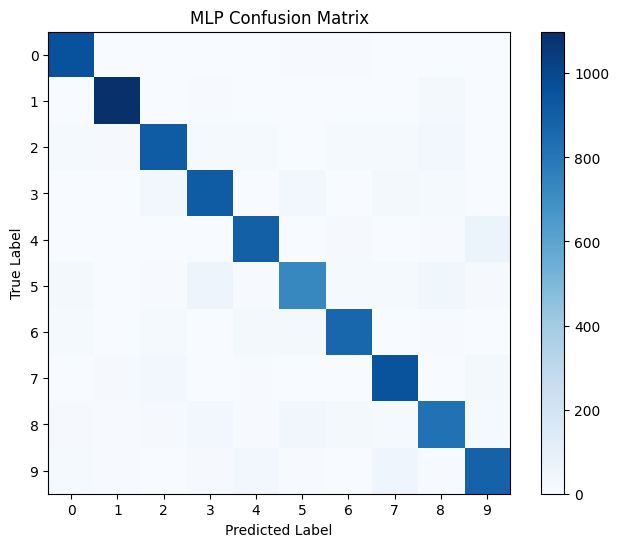

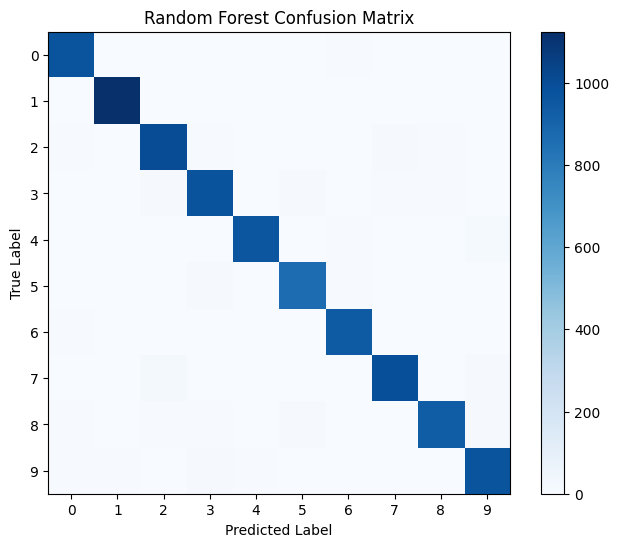

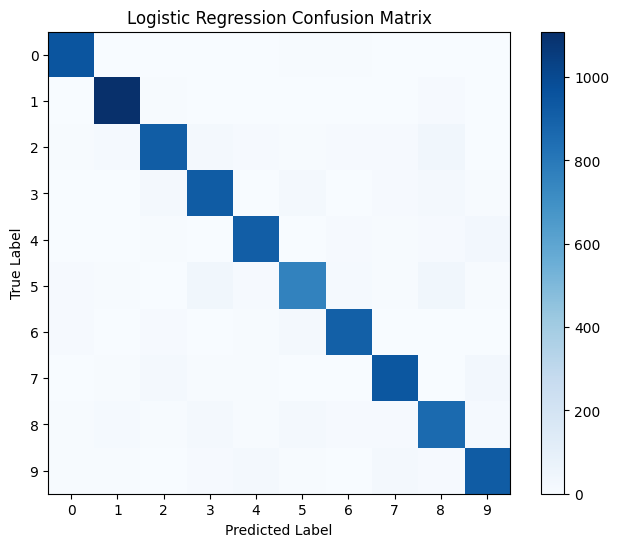

In [ ]:
# MLP
# ... (Code from previous response for training and getting predictions) ...
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate F1-score
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

# Print F1-scores
print(f"MLP F1-score: {mlp_f1}")
print(f"Random Forest F1-score: {rf_f1}")
print(f"Logistic Regression F1-score: {lr_f1}")

# Calculate and plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, np.arange(10))
    plt.yticks(tick_marks, np.arange(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, mlp_predictions, 'MLP Confusion Matrix')
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression Confusion Matrix')

fashion mnist


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.ToTensor()
fashion_mnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_mnist_testloader = torch.utils.data.DataLoader(fashion_mnist_testset, batch_size=64, shuffle=False)

100%|██████████| 26421880/26421880 [00:01<00:00, 13679781.00it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 231419.99it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4265737.54it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5559288.62it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
fashion_mnist_predictions = []
with torch.no_grad():
    for inputs, labels in fashion_mnist_testloader:
        outputs, _ = model(inputs)  # Use the trained MLP model
        _, predicted = torch.max(outputs, 1)
        fashion_mnist_predictions.extend(predicted.numpy())

In [ ]:
fashion_mnist_hidden, fashion_mnist_labels = get_hidden_representations(model, fashion_mnist_testloader)  # Use the trained MLP model

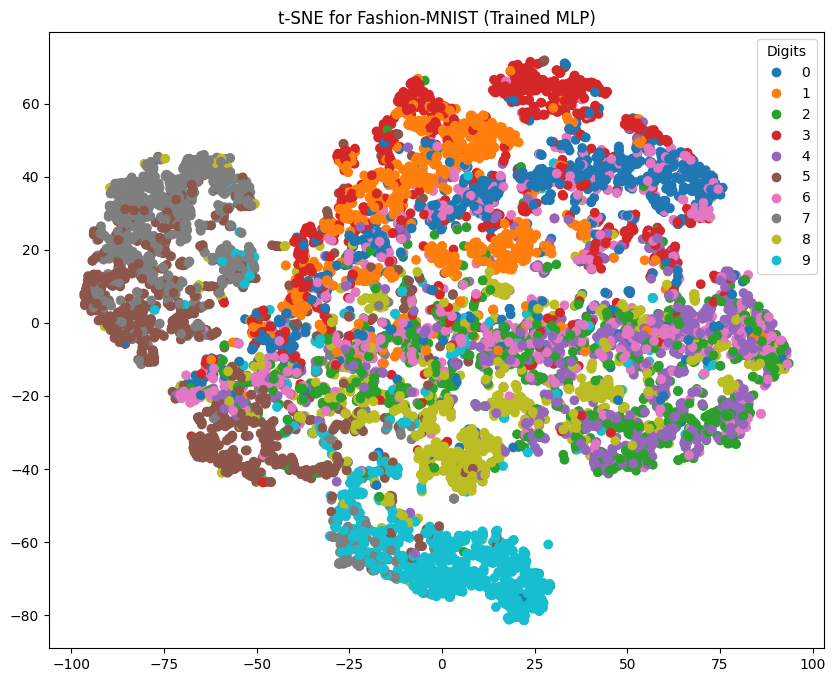

In [ ]:
plot_tsne(fashion_mnist_hidden.numpy(), fashion_mnist_labels.numpy(), 't-SNE for Fashion-MNIST (Trained MLP)')